# YOLOv8 Model Testing

This notebook loads the trained YOLOv8 model and runs predictions on test images, displaying the results with bounding boxes.

In [1]:
# Import required libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import glob
from PIL import Image

In [2]:
# Load the trained YOLOv8 model
model_path = "./models/best.pt"
model = YOLO(model_path)

print(f"Model loaded successfully from: {model_path}")
print(f"Model classes: {model.names}")

Model loaded successfully from: ./models/best.pt
Model classes: {0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'n', 5: 'set'}


In [3]:
# Set up paths
data_path = "./data/images"
output_path = "./predictions"

# Create output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Get all image files
image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp']
image_files = []
for ext in image_extensions:
    image_files.extend(glob.glob(os.path.join(data_path, ext)))

print(f"Found {len(image_files)} images to process")
for img_file in image_files:
    print(f"  - {os.path.basename(img_file)}")

Found 13 images to process
  - 003765a0-Img17.jpeg
  - 69ba6b1c-Img3.jpeg
  - 6d5b6b14-Img18.jpeg
  - 7ab5962a-Img8.jpeg
  - a0a64b21-Img6.jpeg
  - a2449b11-Img1.jpeg
  - a515c20d-Img16.jpeg
  - b9716df6-Img4.jpeg
  - cf49556a-Img19.jpeg
  - d037fb2b-Img7.jpeg
  - df247c62-Img5.jpeg
  - e831b146-Img20.jpeg
  - eeb37100-Img2.jpeg


In [4]:
# Function to draw bounding boxes on image
def draw_predictions(image, results, confidence_threshold=0.5):
    """
    Draw bounding boxes and labels on the image
    """
    # Convert PIL image to numpy array if needed
    if isinstance(image, Image.Image):
        image = np.array(image)
    
    # Make a copy to avoid modifying original
    img_with_boxes = image.copy()
    
    # Get predictions
    boxes = results[0].boxes
    
    if boxes is not None:
        # Get box coordinates, confidences, and class IDs
        xyxy = boxes.xyxy.cpu().numpy()  # bounding boxes
        confidences = boxes.conf.cpu().numpy()  # confidence scores
        class_ids = boxes.cls.cpu().numpy().astype(int)  # class IDs
        
        # Draw boxes for detections above threshold
        for i, (box, conf, class_id) in enumerate(zip(xyxy, confidences, class_ids)):
            if conf >= confidence_threshold:
                x1, y1, x2, y2 = box.astype(int)
                
                # Get class name
                class_name = model.names[class_id] if class_id in model.names else f"Class {class_id}"
                
                # Draw bounding box
                cv2.rectangle(img_with_boxes, (x1, y1), (x2, y2), (0, 255, 0), 2)
                
                # Draw label with confidence
                label = f"{class_name}: {conf:.2f}"
                label_size = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)[0]
                
                # Draw label background
                cv2.rectangle(img_with_boxes, 
                            (x1, y1 - label_size[1] - 10), 
                            (x1 + label_size[0], y1), 
                            (0, 255, 0), -1)
                
                # Draw label text
                cv2.putText(img_with_boxes, label, 
                          (x1, y1 - 5), 
                          cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
    
    return img_with_boxes

Processing: 003765a0-Img17.jpeg


image 1/1 c:\Users\prath\OneDrive\Desktop\crackNcode\data\images\003765a0-Img17.jpeg: 992x1024 16 as, 12 bs, 12 cs, 4 ds, 1 n, 2 sets, 88.0ms
Speed: 32.8ms preprocess, 88.0ms inference, 214.5ms postprocess per image at shape (1, 3, 992, 1024)
image 1/1 c:\Users\prath\OneDrive\Desktop\crackNcode\data\images\003765a0-Img17.jpeg: 992x1024 16 as, 12 bs, 12 cs, 4 ds, 1 n, 2 sets, 88.0ms
Speed: 32.8ms preprocess, 88.0ms inference, 214.5ms postprocess per image at shape (1, 3, 992, 1024)
  - Found 47 detections
Processing: 69ba6b1c-Img3.jpeg

  - Found 47 detections
Processing: 69ba6b1c-Img3.jpeg

image 1/1 c:\Users\prath\OneDrive\Desktop\crackNcode\data\images\69ba6b1c-Img3.jpeg: 1024x992 28 as, 35 bs, 24 cs, 17 ds, 1 n, 2 sets, 87.9ms
Speed: 8.1ms preprocess, 87.9ms inference, 115.7ms postprocess per image at shape (1, 3, 1024, 992)
image 1/1 c:\Users\prath\OneDrive\Desktop\crackNcode\data\images\69ba6b1c-Img3.jpeg: 1024x992 28 as, 35 bs, 24 cs, 17 ds, 1 n,

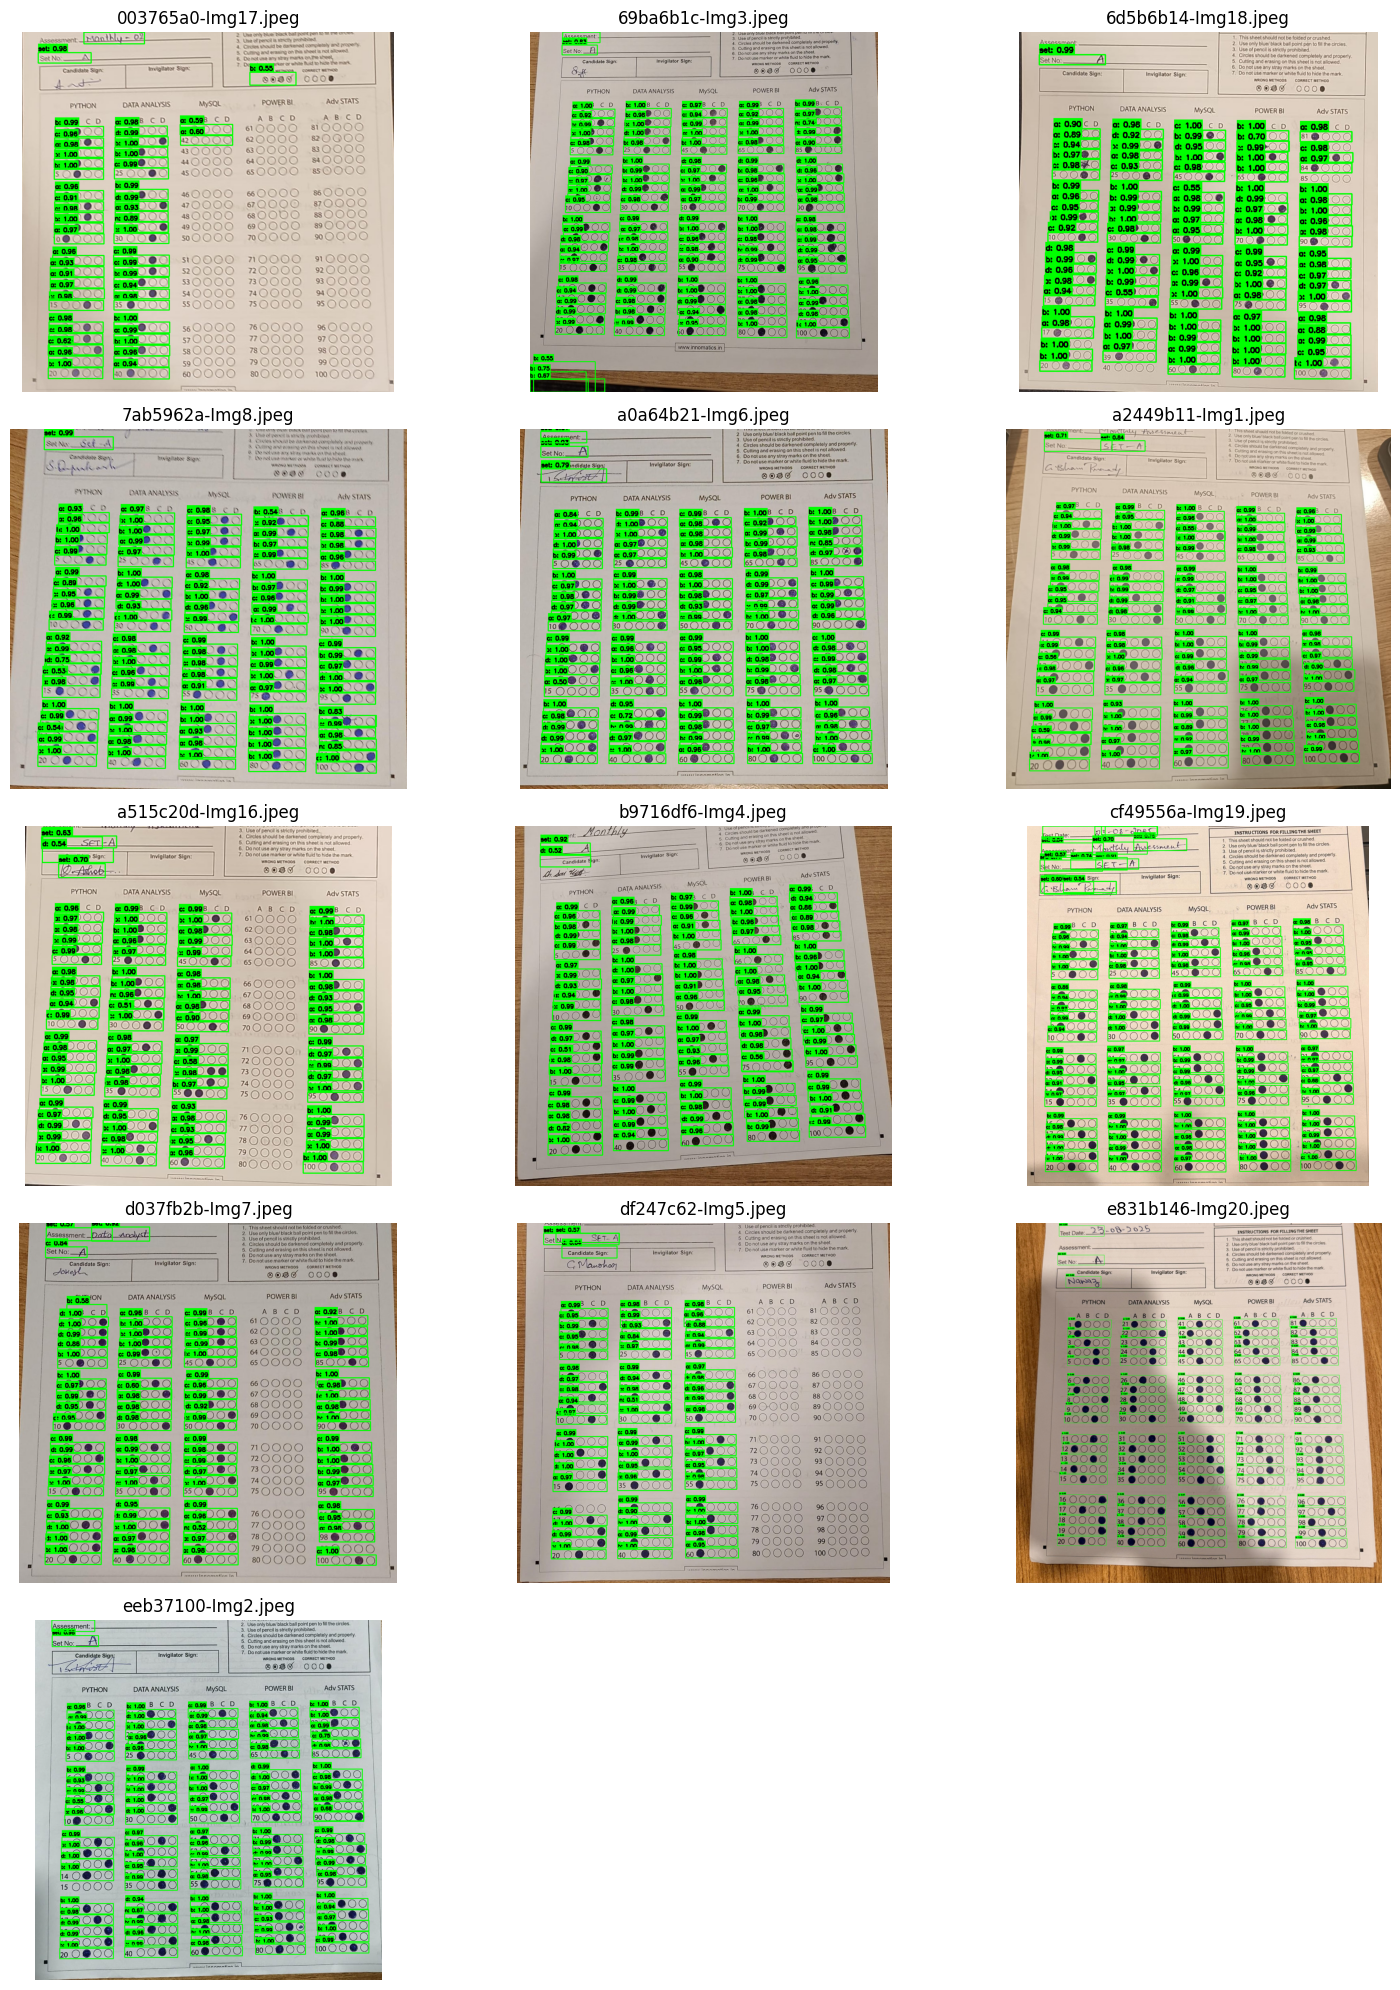


All predictions saved to: ./predictions


In [5]:
# Run predictions on all images
confidence_threshold = 0.5  # Adjust this threshold as needed

plt.figure(figsize=(15, 20))

for idx, image_path in enumerate(image_files):
    print(f"Processing: {os.path.basename(image_path)}")
    
    # Load image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Run prediction
    results = model(image_path, conf=confidence_threshold)
    
    # Draw predictions
    img_with_predictions = draw_predictions(image_rgb, results, confidence_threshold)
    
    # Save the result
    output_filename = f"predicted_{os.path.basename(image_path)}"
    output_filepath = os.path.join(output_path, output_filename)
    cv2.imwrite(output_filepath, cv2.cvtColor(img_with_predictions, cv2.COLOR_RGB2BGR))
    
    # Display the result
    plt.subplot((len(image_files) + 2) // 3, 3, idx + 1)
    plt.imshow(img_with_predictions)
    plt.title(f"{os.path.basename(image_path)}")
    plt.axis('off')
    
    # Print detection summary
    boxes = results[0].boxes
    if boxes is not None:
        num_detections = len(boxes.conf[boxes.conf >= confidence_threshold])
        print(f"  - Found {num_detections} detections")
    else:
        print(f"  - No detections found")

plt.tight_layout()
plt.show()

print(f"\nAll predictions saved to: {output_path}")


image 1/1 c:\Users\prath\OneDrive\Desktop\crackNcode\data\images\003765a0-Img17.jpeg: 992x1024 16 as, 12 bs, 12 cs, 4 ds, 1 n, 2 sets, 99.8ms
Speed: 9.7ms preprocess, 99.8ms inference, 53.6ms postprocess per image at shape (1, 3, 992, 1024)
image 1/1 c:\Users\prath\OneDrive\Desktop\crackNcode\data\images\003765a0-Img17.jpeg: 992x1024 16 as, 12 bs, 12 cs, 4 ds, 1 n, 2 sets, 99.8ms
Speed: 9.7ms preprocess, 99.8ms inference, 53.6ms postprocess per image at shape (1, 3, 992, 1024)
Detections for 003765a0-Img17.jpeg:Detections for 003765a0-Img17.jpeg:
  - b: 1.000
  - b: 0.999
  - b: 0.999
  - b: 0.999
  - b: 0.998
  - b: 0.998
  - b: 0.998
  - b: 0.996
  - c: 0.996
  - d: 0.994
  - d: 0.993
  - b: 0.992
  - c: 0.992
  - c: 0.990
  - b: 0.990
  - b: 0.987
  - d: 0.987
  - c: 0.986
  - a: 0.986
  - c: 0.983
  - c: 0.983
  - a: 0.982
  - c: 0.981
  - a: 0.978
  - a: 0.977
  - d: 0.977
  - c: 0.976
  - set: 0.976
  - a: 0.970
  - a: 0.967
  - a: 0.963
  - a: 0.963
  - a: 0.963
  - a: 0.961
  

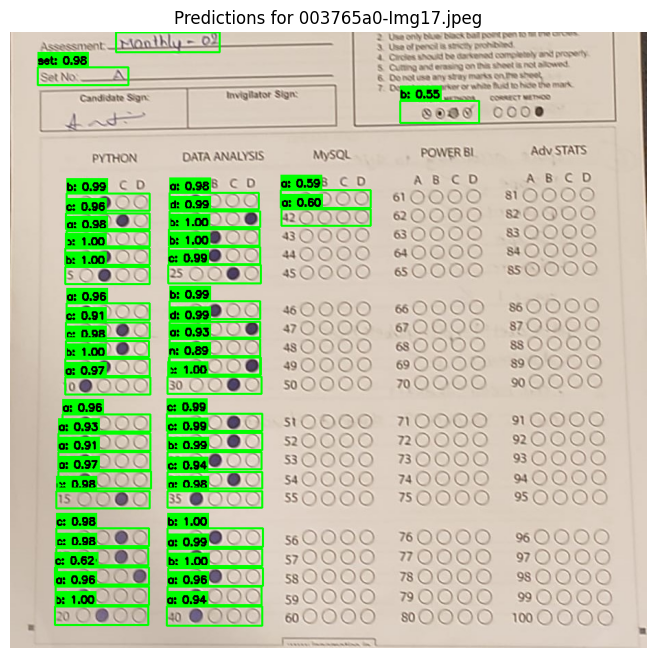

In [6]:
# Optional: Display individual images with larger size for better visibility
def display_single_prediction(image_path, confidence_threshold=0.5):
    """Display a single image with predictions in larger size"""
    # Load image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Run prediction
    results = model(image_path, conf=confidence_threshold)
    
    # Draw predictions
    img_with_predictions = draw_predictions(image_rgb, results, confidence_threshold)
    
    # Display
    plt.figure(figsize=(12, 8))
    plt.imshow(img_with_predictions)
    plt.title(f"Predictions for {os.path.basename(image_path)}")
    plt.axis('off')
    
    # Print detailed detection info
    boxes = results[0].boxes
    if boxes is not None:
        confidences = boxes.conf.cpu().numpy()
        class_ids = boxes.cls.cpu().numpy().astype(int)
        valid_detections = confidences >= confidence_threshold
        
        print(f"Detections for {os.path.basename(image_path)}:")
        for i, (conf, class_id) in enumerate(zip(confidences[valid_detections], class_ids[valid_detections])):
            class_name = model.names[class_id] if class_id in model.names else f"Class {class_id}"
            print(f"  - {class_name}: {conf:.3f}")
    else:
        print(f"No detections found in {os.path.basename(image_path)}")
    
    plt.show()

# Example: Display the first image with larger size
if image_files:
    display_single_prediction(image_files[0])

## Model Performance Summary

The notebook above will:

1. **Load your trained YOLOv8 model** from `./models/best.pt`
2. **Process all images** in the `./data/images/` directory
3. **Run predictions** with configurable confidence threshold
4. **Draw bounding boxes** with class labels and confidence scores
5. **Display results** in a grid layout for easy comparison
6. **Save predicted images** to a `./predictions/` folder
7. **Provide detailed detection summaries** for each image

### Key Features:
- Adjustable confidence threshold (default: 0.5)
- Color-coded bounding boxes with labels
- Automatic output directory creation
- Support for multiple image formats (jpg, jpeg, png, bmp)
- Individual image display function for detailed inspection

### Usage Tips:
- Modify `confidence_threshold` to filter detections
- Use `display_single_prediction()` to examine specific images in detail
- Check the `./predictions/` folder for saved results